# SALES PREDICTIONS FOR ACME TEXTILE CORP

This project was developed for the IE Capstone Project with the dataset provided by KPMG of ACME Textile Corp.

1. [Import Libraries](#section-1)
2. [Import Dataset](#section-2)
3. [Exploratory Data Anlysis](#section-3)
4. [Cleaning and Visualizing Data](#section-4)
5. [Feature Engineering](#section-5)
6. [Modeling](#section-6)
7. [Conclusions](#section-7)

## **1. Import Libraries**
<a id='section-1'></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import IPython
import IPython.display
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline  
import datetime as dt
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
%pip install pandas-profiling
from pandas_profiling import ProfileReport

# Configure Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Note: you may need to restart the kernel to use updated packages.


C:\Users\amish\AppData\Local\Temp/ipykernel_20116/1538527740.py:16: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
!pip install xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## **2.Import Dataset**
<a id='section-2'></a>

All the data was taken from the dataset provided by KPMG. The dataset has the following columns:
- year-week: year and number of week inside a year
- ID_material: Internal identification number of the product
- Units: Units of sales for each product every week of the year

In [3]:
url = 'https://raw.githubusercontent.com/AmisheeChoksi/IE_Capstone_KPMG_Group9/main/IE%20KPMG_Demand%20Forecast%20dataset.csv'
df = pd.read_csv(url)

In [4]:
df.head(5)

year-week  ID_material Units
0   2019-11    120010970   540
1   2019-12    120010970   750
2   2019-13    120010970   960
3   2019-14    120010970   720
4   2019-15    120010970  1620

## **3. Exploratory Data Analysis (EDA)**
<a id='section-3'></a>

Exploring the data to identify:
*   Missing values
*   Data types
*   Irregularities in the data


In [5]:
df.shape

(2857, 3)

In [6]:
df.isnull().sum()

year-week      0
ID_material    0
Units          0
dtype: int64

In [7]:
print("The initial type for each column is: ")
df.dtypes

The initial type for each column is: 


year-week      object
ID_material     int64
Units          object
dtype: object

The ID_material & Units columns will need to be transformed to a integer.

Year-week will have to be transformed to a Date-Time format 

In [8]:
#Checking if there are any irregularities in the Units column as it's type is a float.
df[:None]

year-week  ID_material   Units
0      2019-11    120010970     540
1      2019-12    120010970     750
2      2019-13    120010970     960
3      2019-14    120010970     720
4      2019-15    120010970    1620
5      2019-16    120010970     900
6      2019-17    120010970     420
7      2019-18    120010970     360
8      2019-19    120010970    1320
9      2019-20    120010970     600
10     2019-21    120010970    2130
11     2019-22    120010970    3660
12     2019-23    120010970    3360
13     2019-24    120010970    2040
14     2019-25    120010970    2400
15     2019-26    120010970    2520
16     2019-27    120010970    1800
17     2019-28    120010970       0
18     2019-29    120010970     360
19     2019-30    120010970     240
20     2019-31    120010970    1200
21     2019-32    120010970    1380
22     2019-33    120010970     480
23     2019-34    120010970    1800
24     2019-35    120010970     840
25     2019-36    120010970    2100
26     2019-37    120010970    1260
27     2019-38    120010970    1380
28     2019-39    120010970    1200
29     2019-40    120010970    1200
30     2019-41    120010970    1020
31     2019-42    120010970     720
32     2019-43    120010970    1560
33     2019-44    120010970    1320
34     2019-45    120010970    1440
35     2019-46    120010970    1080
36     2019-47    120010970    1680
37     2019-48    120010970    1980
38     2019-49    120010970    1260
39     2019-50    120010970    1500
40     2019-51    120010970    1140
41     2019-52    120010970    1200
42     2020-01    120010970     420
43     2020-02    120010970    1020
44     2020-03    120010970    1980
45     2020-04    120010970     480
46     2020-05    120010970    1320
47     2020-06    120010970    2280
48     2020-07    120010970     240
49     2020-08    120010970    1500
50     2020-09    120010970    1800
51     2020-10    120010970    2460
52     2020-11    120010970     960
53     2020-12    120010970     780
54     2020-13    120010970     960
55     2020-14    120010970    3600
56     2020-15    120010970     480
57     2020-16    120010970    1440
58     2020-17    120010970     420
59     2020-18    120010970       0
60     2020-19    120010970     840
61     2020-20    120010970     870
62     2020-21    120010970     900
63     2020-22    120010970     600
64     2020-23    120010970     120
65     2020-24    120010970    1920
66     2020-25    120010970    2280
67     2020-26    120010970    2640
68     2020-27    120010970    1920
69     2020-28    120010970    1200
70     2020-29    120010970     420
71     2020-30    120010970     300
72     2020-31    120010970     840
73     2020-32    120010970     540
74     2020-33    120010970    1350
75     2020-34    120010970    2160
76     2020-35    120010970    1380
77     2020-36    120010970    1320
78     2020-37    120010970    1140
79     2020-38    120010970    1440
80     2020-39    120010970     780
81     2020-40    120010970    1200
82     2020-41    120010970    1020
83     2020-42    120010970     780
84     2020-43    120010970     690
85     2020-44    120010970     600
86     2020-45    120010970    1680
87     2020-46    120010970    1140
88     2020-47    120010970     540
89     2020-48    120010970     240
90     2020-49    120010970       0
91     2020-50    120010970     480
92     2020-51    120010970    1740
93     2020-52    120010970     780
94     2020-53    120010970     420
95     2021-01    120010970    1500
96     2021-02    120010970    1320
97     2021-03    120010970    2640
98     2021-04    120010970    2520
99     2021-05    120010970    1320
100    2021-06    120010970     300
101    2021-07    120010970    1620
102    2021-08    120010970    1260
103    2021-09    120010970     900
104    2021-10    120010970    1200
105    2021-11    120010970     720
106    2021-12    120010970    1740
107    2021-13    120010970    1260
108    2021-14    120010970    2460
109    2021-15    120010970     720
110    20

Although at a first glance it seems that the data is clean, rows **#2450, #2743, #2745 have decimal values**, which means that it is an erroneous value as it is not possible to sell half of an item. These values will be handeled later on.

In [9]:
#Identifying length of data available per ID_material
print("Number of ID_material:", len(df['ID_material'].unique()))
print (df['ID_material'].value_counts())

Number of ID_material: 14
120004096    299
120014488    268
120014486    261
120009816    243
120015996    240
120009814    233
120010342    231
120010566    218
120010970    186
120011782    165
120011556    157
120012154    138
120012606    118
120015842    100
Name: ID_material, dtype: int64


In [10]:
#Creating a pandas profiling report to identify any patterns / correlations
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **3.1 Main Takeaways from EDA**

The main takeaways from the EDA process are the following:

**Missing values:** No missing values were detected. Although in the column "Units" 8% of the rows have zero values, this does not mean it is a missing value, it just indicates there were no sales for that specific material in a given date.

**Outliers:** No clear outliers have been detected.

**Correlations:** There is no correlation among any of the columns.

**Prediction and target feature:** The target feature is numerical (Units). Decissions will need to be made as to, how to properly handle dates, and if possible how to enrich the data as 3 columns and almost 3000 rows is scarce when trying to build a machine learning algorithgm.

## **4.Cleaning and Visualizing Data**
<a id='section-4'></a>

### **4.1 Cleaning the Data**

As stated earlier, there are *3 values in the "Units" column that have a .5 value.* **We assume as a mistake from the person who is logging the data.** As we do not have many data points we have decided to keep these and round up the value to transform the value to an integer.

In [11]:
#Cleaning the "Units" column by converting the column into a float first.
df['Units'] = pd.to_numeric(df['Units'], errors='coerce').fillna(0)

#Now that the column is a float we need to round up the values that have a decimal value and convert it to an integer value.
df['Units'] = df['Units'].apply(lambda x: int(np.ceil(x)))

### **4.2 Visualizing the Data**

In [12]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

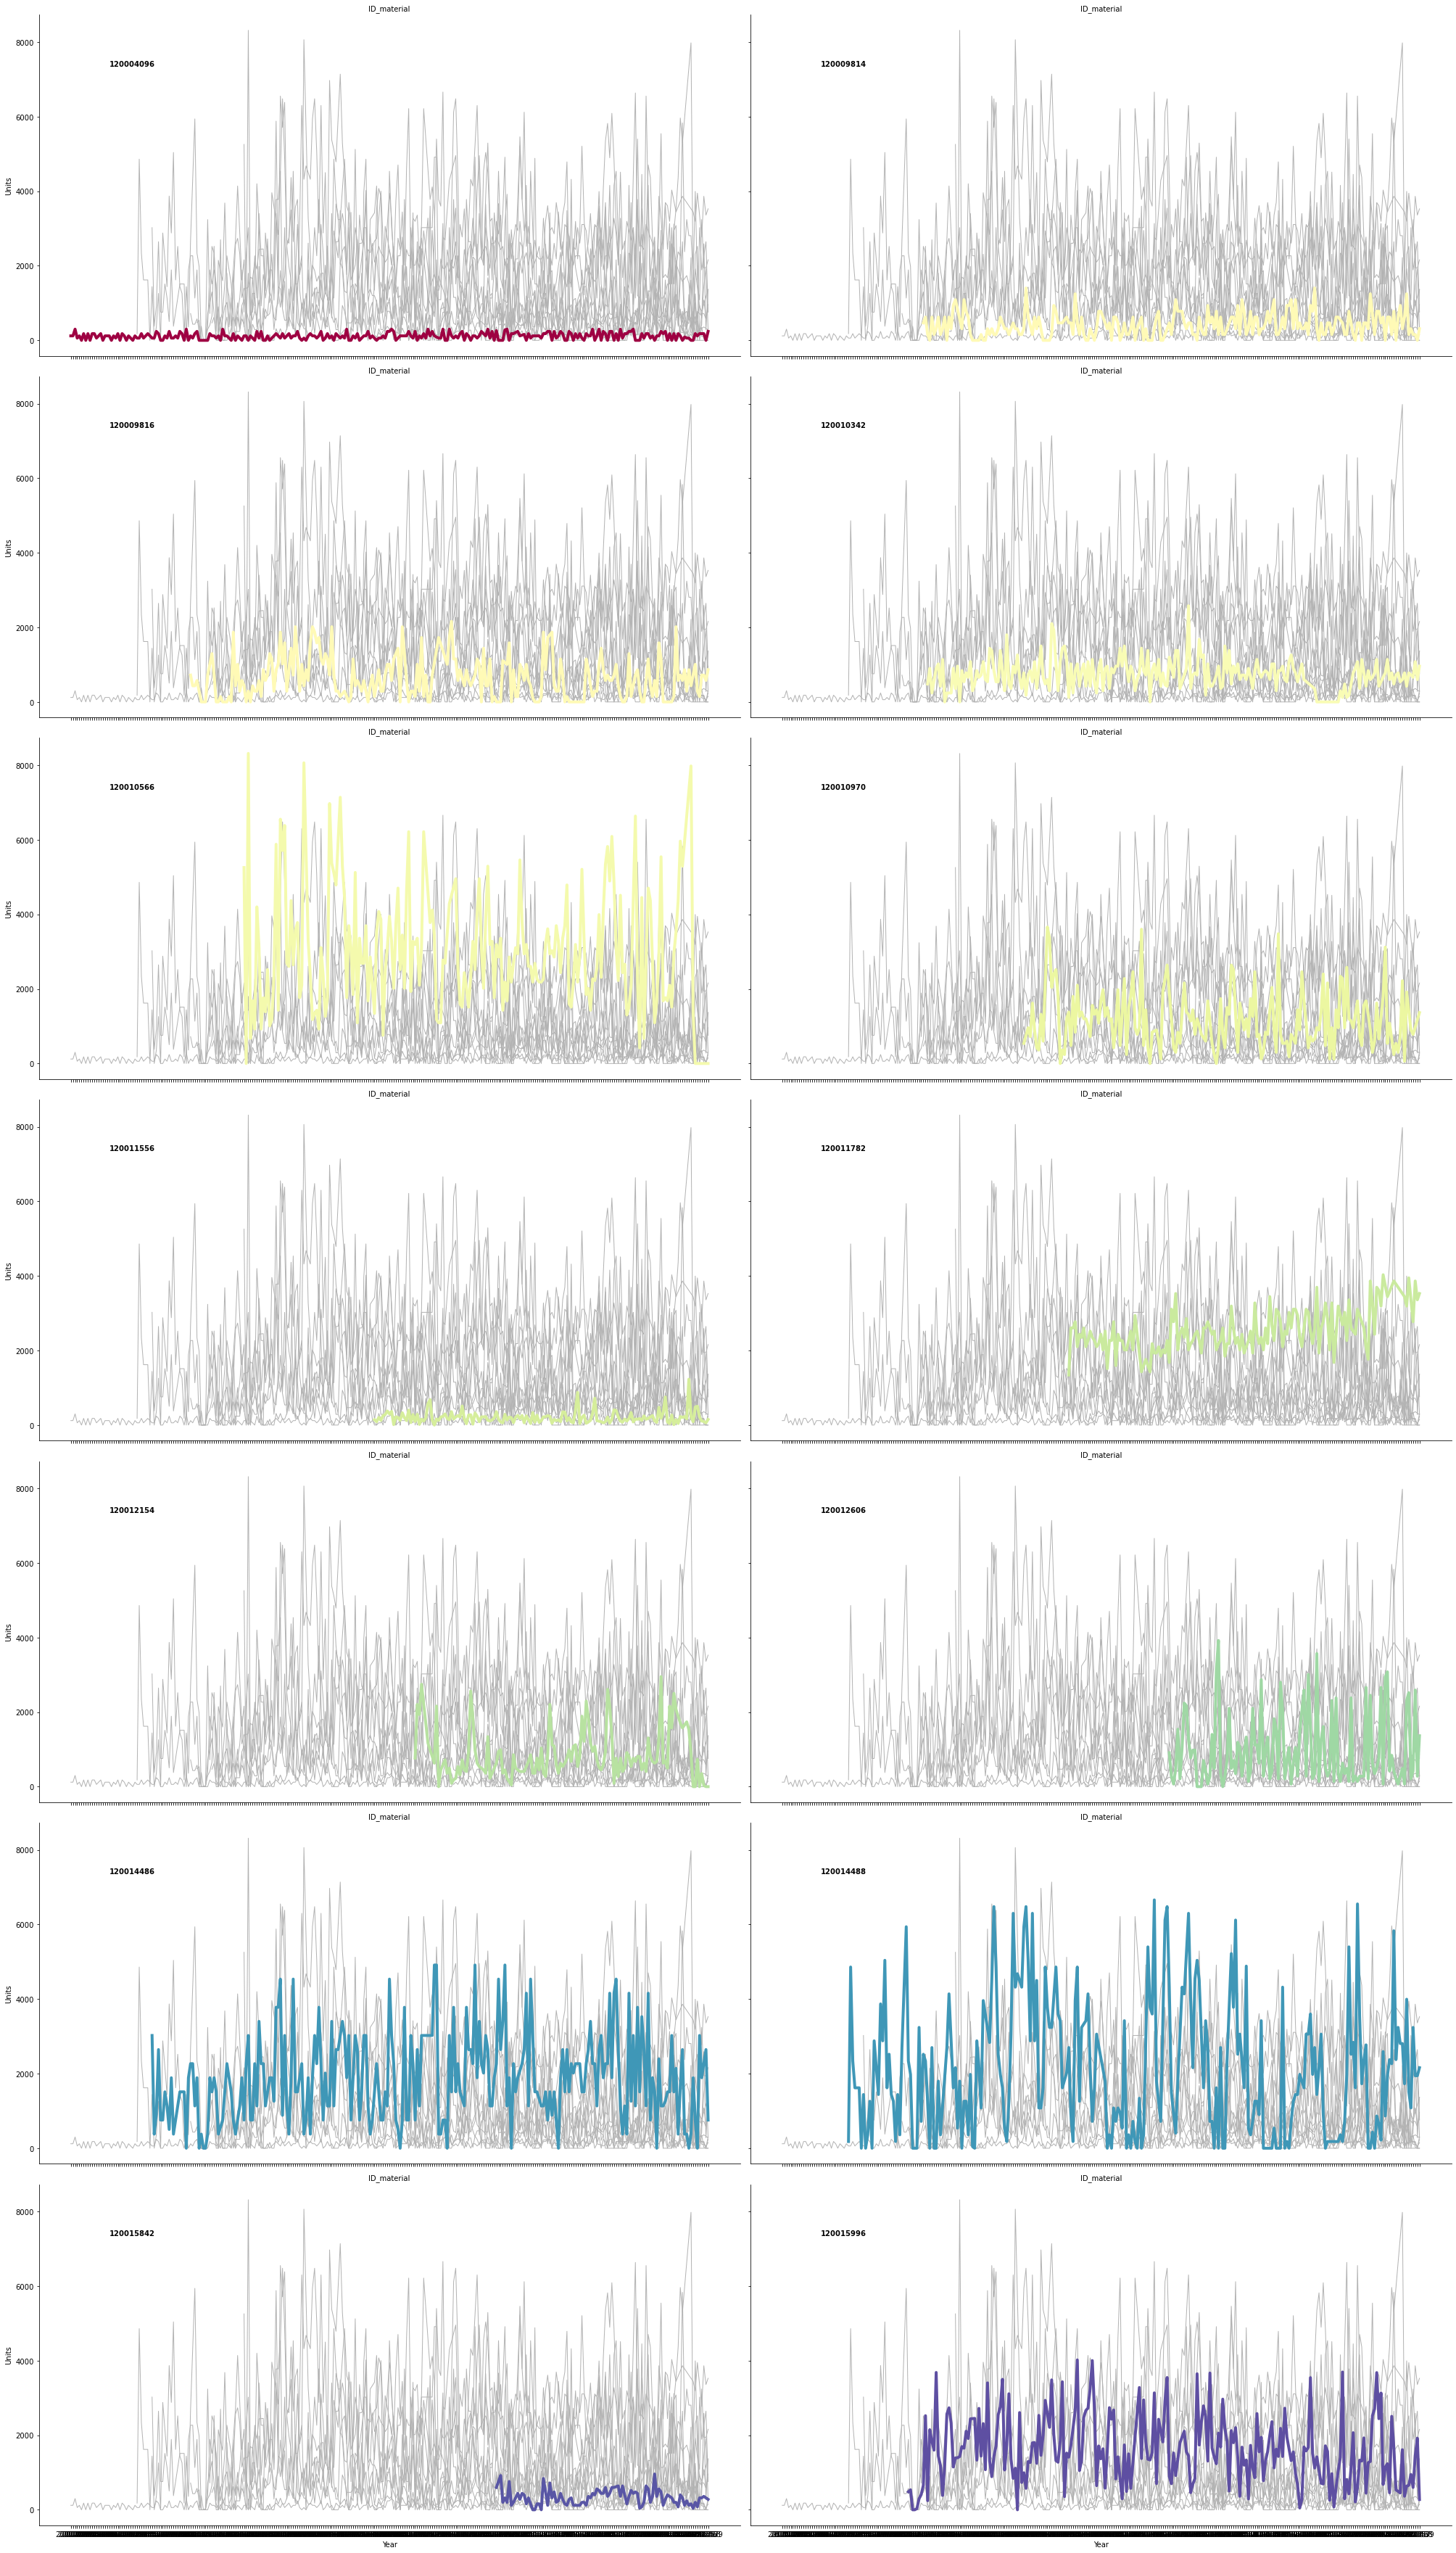

In [13]:
#Visualization of sales of ID_material's

g = sns.relplot(data = df, x = "year-week", y = "Units",
                col = "ID_material", hue = "ID_material",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 2, height = 7, aspect = 2, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df, x = "year-week", y = "Units", units="ID_material",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

g.set_titles("ID_material")
g.set_axis_labels("Year", "Units")
g.tight_layout()

As the plots show, there are no clear discernable trends for sales.
 
There are also no changes in trends post the 2020 which may have occured due to the Covid-19 pandemic

## **5.Feature Engineering** 
<a id='section-5'></a>

### Creating dates from the year-week
We know that sales are recorded every Saturday of the week, the next step is to add a column to the df where the year-week column is transformed into a full date format (YYYY - MM - DD)

In [14]:
# Create date column
df['date'] = pd.to_datetime(df['year-week'] + '-6', format='%G-%V-%u')

In [15]:
df.head(5)

year-week  ID_material  Units       date
0   2019-11    120010970    540 2019-03-16
1   2019-12    120010970    750 2019-03-23
2   2019-13    120010970    960 2019-03-30
3   2019-14    120010970    720 2019-04-06
4   2019-15    120010970   1620 2019-04-13

In [16]:
#extracting day, month and year from the date
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [17]:
#extracting quarters from the months
df['quarter'] = pd.cut(df['month'], [0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [18]:
#re-ordering the columns for readability
columns = ['year-week','date','day','month','year','quarter','ID_material','Units']
df = df.reindex(columns=columns)

In [19]:
df.head()

year-week       date  day  month  year quarter  ID_material  Units
0   2019-11 2019-03-16   16      3  2019      Q1    120010970    540
1   2019-12 2019-03-23   23      3  2019      Q1    120010970    750
2   2019-13 2019-03-30   30      3  2019      Q1    120010970    960
3   2019-14 2019-04-06    6      4  2019      Q2    120010970    720
4   2019-15 2019-04-13   13      4  2019      Q2    120010970   1620

## **6. Modeling**
<a id='section-6'></a>

The sales of each product (ID_material) are uncorrelated, and hence a separate model will need to be created for each.

To begin with, we use the ID_material with the highest number of observations available - code: 120004096.

In [20]:
df_4096 = df[df['ID_material']==120004096]

### 6.1 Splitting the data into a train-test split

Given that the data is classified according to dates, we split the data into training and testing based on the date, to not lose the importance of time

In [21]:
# Calculate the number of rows in the dataframe
n_rows = df_4096.shape[0]

# Calculate the index of the last row in the training set
last_train_row = int(n_rows * 0.7)

# Split the data into training and test sets
df_train = df_4096.iloc[:last_train_row]
df_test = df_4096.iloc[last_train_row:]

In [22]:
X_train = df_train.drop(['Units', 'year-week','date'], axis=1)
Y_train = df_train['Units']

In [23]:
X_test = df_test.drop(['Units', 'year-week','date'], axis=1)
Y_test = df_test['Units']

The year, month,day and quarter columns are treated as ordinal values.

We target encoded these columns instead of one-hot encoding so we could avoid the problem of having a very large but sparse dataset

In [24]:
#using a column transformer to ensure the same can be fit across multiple model pipelines
column_transformer = make_column_transformer(
    (TargetEncoder(), ['year','month','day','quarter']),
    remainder='passthrough'
)

X_train_transformed=column_transformer.fit_transform(X_train,Y_train)
X_test_transformed=column_transformer.transform(X_test)

### 6.2 Building a baseline Regression Model

We build a baseline regression model that can be used to compare the performance of each of the subsequent models 

In [25]:
model = LinearRegression() 

model.fit(X_train_transformed, Y_train)

print(model.score(X_train_transformed, Y_train))


0.021856312160149383


In [26]:
pipe = make_pipeline(column_transformer,LinearRegression())
model=LinearRegression()

pipe.fit(X_train,Y_train)
pipe.score(X_train,Y_train)

0.021856312160149383

The model does not show a very high score, potentially due to the limited amount of data available  

### 6.3 Experimenting with other models 

The following models are run to identify the one with the best performance
*   Random Forest Regressor
*   Gradient Booster
*   XG Boost




In [27]:
#Random Forest Regressor
pipe2 = make_pipeline(column_transformer, RandomForestRegressor(n_estimators = 1000))
print("AVG accuracy = {:.4}".format(np.mean(cross_val_score(pipe2, X_train, Y_train, cv=5))))

AVG accuracy = -0.1399


In [28]:
#Gradient Boosting Regressor
reg = GradientBoostingRegressor(random_state=0)

pipe3 = make_pipeline(column_transformer, reg)
print("AVG accuracy = {:.4}".format(np.mean(cross_val_score(pipe3, X_train, Y_train, cv=5))))


AVG accuracy = -0.3917


In [29]:
#XGBoost Regressor
model = XGBRegressor(verbosity = 0)
pipe4 = make_pipeline(column_transformer, model)
print("AVG accuracy = {:.4}".format(np.mean(cross_val_score(pipe4, X_train, Y_train, cv=5))))


AVG accuracy = -0.4725


## **7. Conclusions**
<a id='section-7'></a>

All the machine learning models are not performing well with the limited amount of data available.

It is possible that by capturing more data and adding extra features, the models may be improved upon. 

However, given that the nature of data is a timeseries, we will focus on building concrete predictions with SARIMA models. This will keep the importance of the time factor and ensure we can predict accurately two steps in the future (t+1 and t+2).